In [43]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Age: Numeric (e.g., 52) 
Sex: Categorical (0: Female, 1: Male) 
Chest Pain Type: Categorical (0: Typical Angina, 1: Atypical Angina, 2: Non-anginal Pain, 3: Asymptomatic) 
Resting Blood Pressure: Numeric (e.g., 125) 
Serum Cholesterol: Numeric in mg/dL (e.g., 212) 
Fasting Blood Sugar: Categorical (0: <= 120 mg/dL, 1: > 120 mg/dL) 
Resting Electrocardiographic Results: Categorical (0: Normal, 1: Abnormality, 2: Hypertrophy) 
Maximum Heart Rate Achieved: Numeric (e.g., 168) 
Exercise-Induced Angina: Categorical (0: No, 1: Yes) 
Oldpeak (ST Depression): Numeric (e.g., 1.0) 
Slope of Peak Exercise ST Segment: Categorical (0: Upsloping, 1: Flat, 2: Downsloping) 
Number of Major Vessels Colored by Fluoroscopy: Numeric (0 to 3) 
Thalassemia: Categorical (0: Normal, 1: Fixed Defect, 2: Reversible Defect)

In [3]:
df = pd.read_csv('C:/Users/FRANK/Desktop/Proyectos Linkedin/Python Proyectos/heart.csv' , sep = ',')

In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0.23
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0.37
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0.24
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0.28
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0.21


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   float64
dtypes: float64(2), int64(12)
memory usage: 112.2 KB


Importamos la libreria missigno para observar si existe algun dato nulo

In [6]:
import missingno as msno

<Axes: >

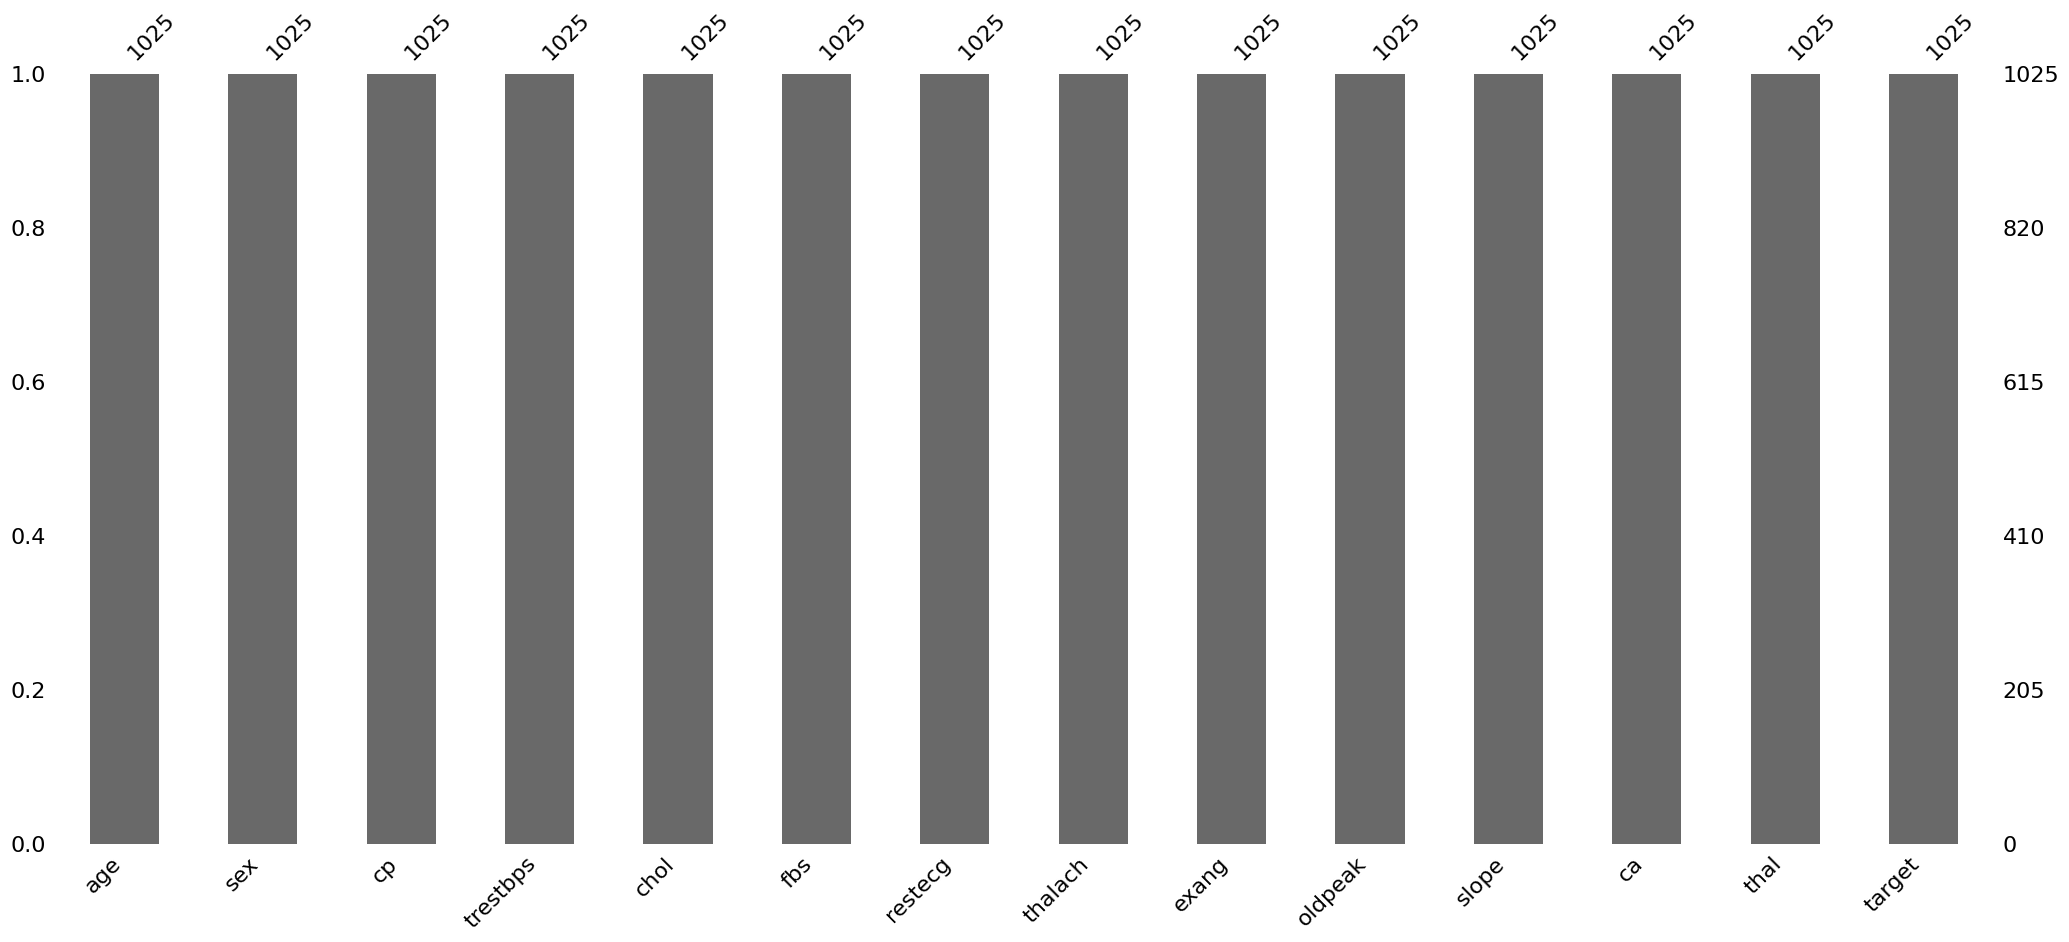

In [7]:
msno.bar(df)

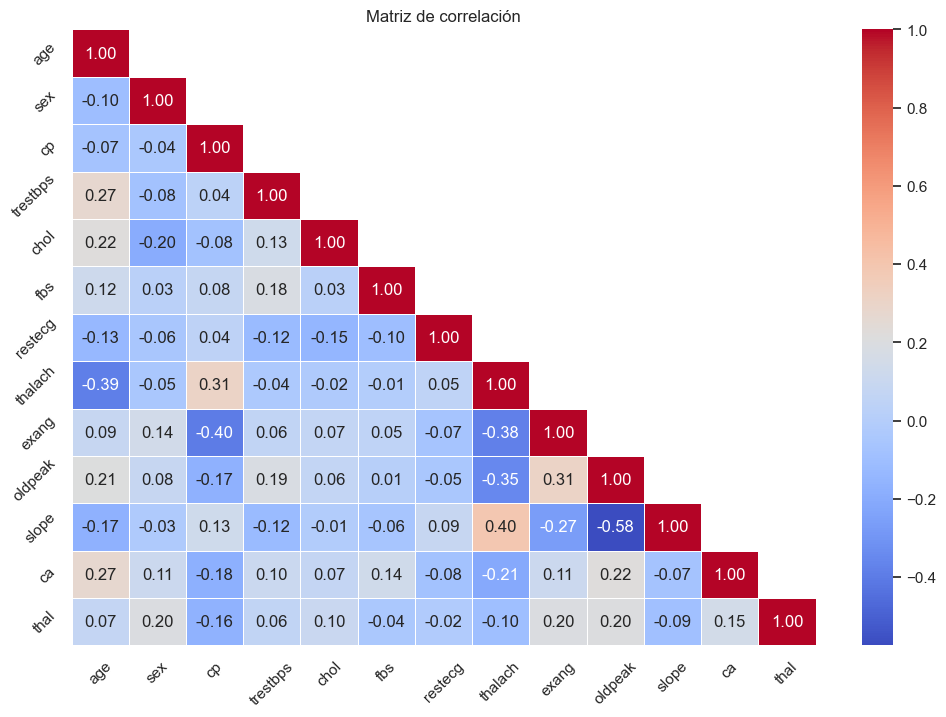

In [8]:
datos = ['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal']
matriz_corr = df[datos].corr()
plt.figure(figsize=(12,8))
sns.set(style='white')
sns.heatmap(matriz_corr, annot=True, cmap='coolwarm', linewidths=0.5 , fmt='.2f' , mask=np.triu(matriz_corr, k=1))
plt.title('Matriz de correlación')
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()


Cambiamos el nombre de las columnas, para que se pueda entender mejor

In [9]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0.23
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0.37
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0.24
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0.28
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0.21


In [10]:
df['sex'] = df['sex'].replace({0: 'Femenino ', 1 : 'Masculino'})
df['cp'] = df['cp'].replace({0: 'Angina Típica', 1 : 'Angina Atípica', 2 : 'Dolor No Anginoso', 3 : 'Asintomático'})
df['fbs'] = df['fbs'].replace({0: ' <= 120 mg/dL', 1 : '> 120 mg/dL'})
df['restecg'] = df['restecg'].replace({0: 'Normal', 1 : 'Anormalidad', 2 : 'Hipertrofia'})
df['exang'] = df['exang'].replace({0: 'No', 1 : 'Si'})
df['slope'] = df['slope'].replace({0: 'Ascendente', 1 : 'Plano', 2 : 'Descendente'})
df['thal'] = df['thal'].replace({0: 'Normal', 1 : 'Defecto Fijo', 2 : 'Defecto Reversible'})

In [81]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,Masculino,Angina Típica,125,212,<= 120 mg/dL,Anormalidad,168,No,1.0,Descendente,2,3,0.23
1,53,Masculino,Angina Típica,140,203,> 120 mg/dL,Normal,155,Si,3.1,Ascendente,0,3,0.37
2,70,Masculino,Angina Típica,145,174,<= 120 mg/dL,Anormalidad,125,Si,2.6,Ascendente,0,3,0.24
3,61,Masculino,Angina Típica,148,203,<= 120 mg/dL,Anormalidad,161,No,0.0,Descendente,1,3,0.28
4,62,Femeino,Angina Típica,138,294,> 120 mg/dL,Anormalidad,106,No,1.9,Plano,3,Defecto Reversible,0.21


1. Distribución de edad

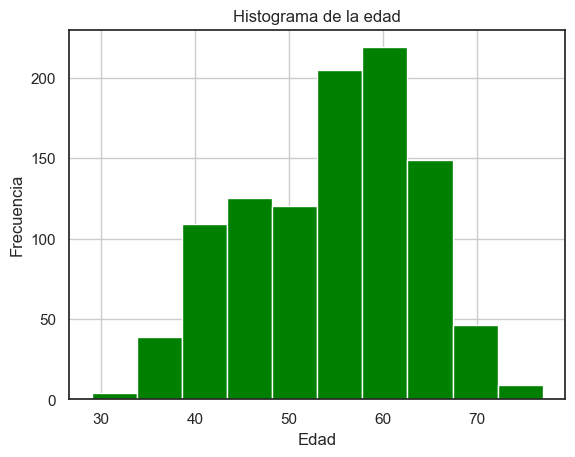

In [11]:
df['age'].hist(bins=10, color='Green')
plt.title('Histograma de la edad')
plt.ylabel('Frecuencia')
plt.xlabel('Edad')
plt.show()

2. Histograma de Masculino y Femenino

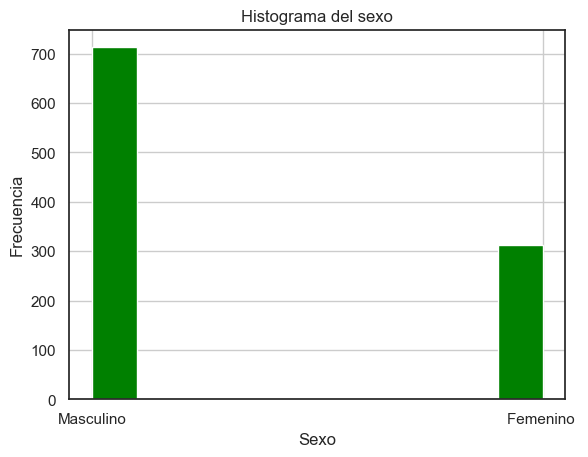

In [12]:
df['sex'].hist(bins=10, color='Green')
plt.title('Histograma del sexo')
plt.ylabel('Frecuencia')
plt.xlabel('Sexo')
plt.show()

3. Grafico de dispersión de edad vs enfermedad

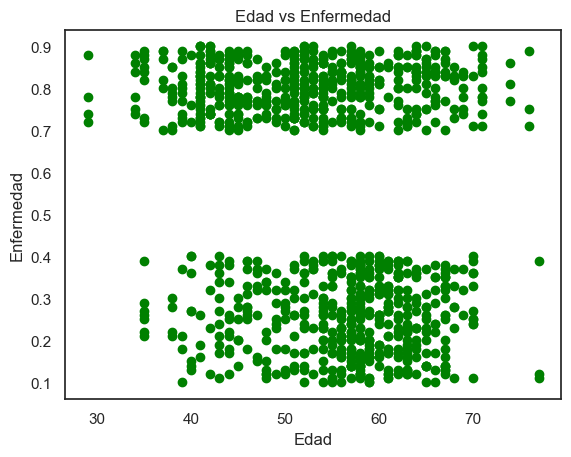

In [13]:
plt.scatter(df['age'], df['target'], color='Green') 
plt.title('Edad vs Enfermedad')
plt.xlabel('Edad')
plt.ylabel('Enfermedad')
plt.show()

4. Sexo vs Enfermedad

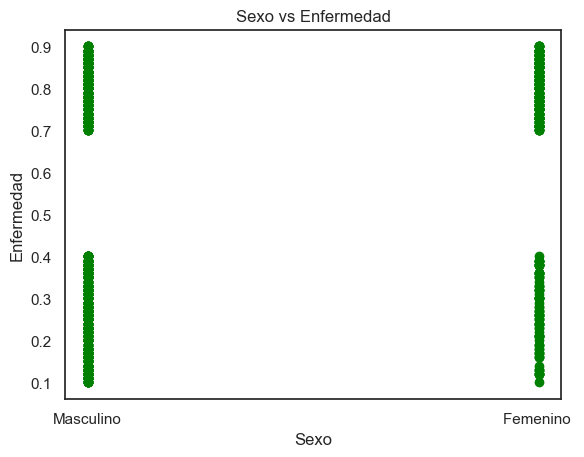

In [14]:
plt.scatter(df['sex'], df['target'], color='Green')
plt.title('Sexo vs Enfermedad')
plt.ylabel('Enfermedad')
plt.xlabel('Sexo')
plt.show()

5. Distribución del Riesgo de Enfermedad entre Géneros

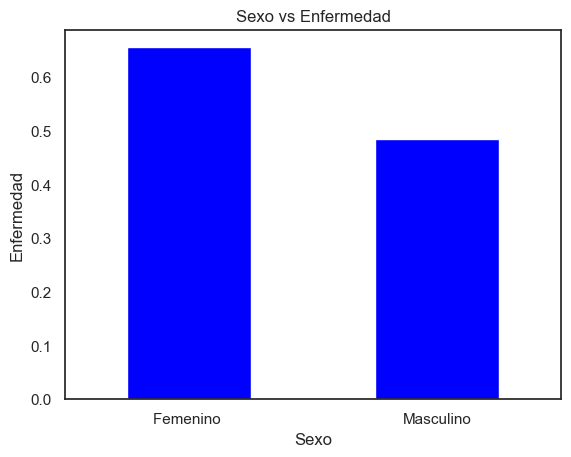

In [15]:
df.groupby('sex')['target'].mean().plot(kind='bar', color='Blue')
plt.title('Sexo vs Enfermedad')
plt.xlabel('Sexo')
plt.ylabel('Enfermedad')
plt.xticks(rotation=0)
plt.show()

6. Correlación entre Dolor Pectoral y Probabilidad de Ataque al Corazón

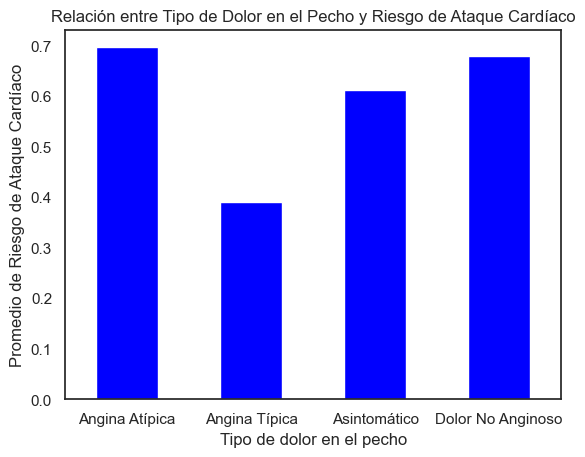

In [16]:
df.groupby('cp')['target'].mean().plot(kind='bar', color='Blue')
plt.title('Relación entre Tipo de Dolor en el Pecho y Riesgo de Ataque Cardíaco')
plt.ylabel('Promedio de Riesgo de Ataque Cardíaco')
plt.xlabel('Tipo de dolor en el pecho')
plt.xticks(rotation=0)
plt.show()

7. Influencia del Colesterol Sérico en el Riesgo de Eventos Cardiacos

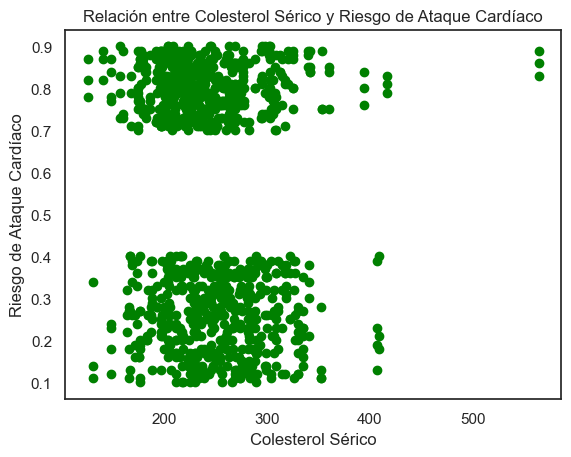

In [17]:
plt.scatter(df['chol'], df['target'], color='Green')
plt.title('Relación entre Colesterol Sérico y Riesgo de Ataque Cardíaco')
plt.xlabel('Colesterol Sérico')
plt.ylabel('Riesgo de Ataque Cardíaco')
plt.show()

8. Efecto del Azúcar en Sangre en Ayunas y Angina Inducida por el Ejercicio

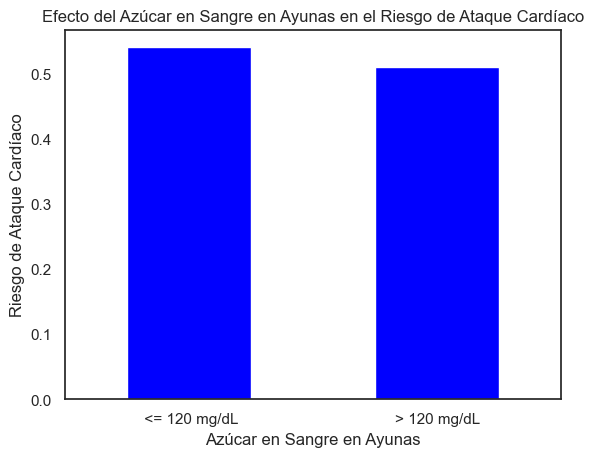

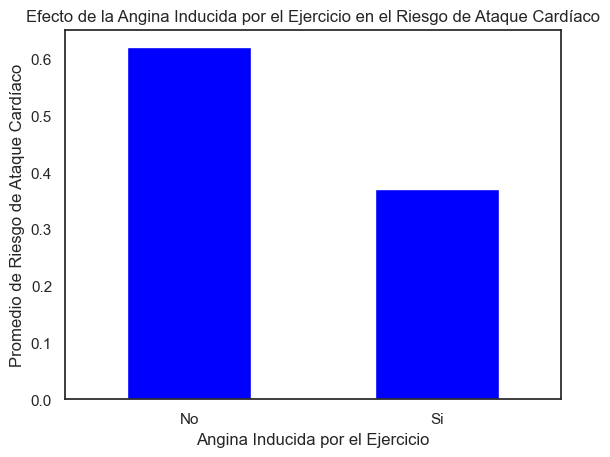

In [18]:
df.groupby('fbs')['target'].mean().plot(kind='bar', color='Blue')
plt.title('Efecto del Azúcar en Sangre en Ayunas en el Riesgo de Ataque Cardíaco')
plt.xlabel('Azúcar en Sangre en Ayunas')
plt.ylabel('Riesgo de Ataque Cardíaco')
plt.xticks(rotation=0)
plt.show()

df.groupby('exang')['target'].mean().plot(kind='bar', color='Blue')
plt.title('Efecto de la Angina Inducida por el Ejercicio en el Riesgo de Ataque Cardíaco')
plt.xlabel('Angina Inducida por el Ejercicio')
plt.ylabel('Promedio de Riesgo de Ataque Cardíaco')
plt.xticks(rotation=0)
plt.show()

9 Perfil de Riesgo Cardíaco: Edad Media Diferenciada por Sexo

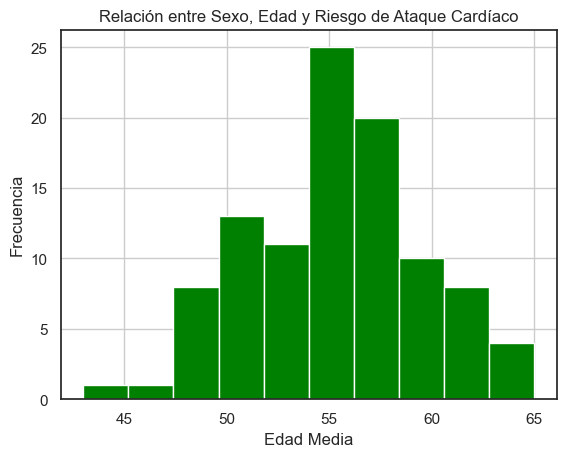

In [26]:
df.groupby(['target', 'sex',])['age'].mean().hist(bins=10, color='Green')
plt.title('Relación entre Sexo, Edad y Riesgo de Ataque Cardíaco')
plt.xlabel('Edad Media')
plt.ylabel('Frecuencia')
plt.show()

10 Distribución de Género en la Población del Estudio

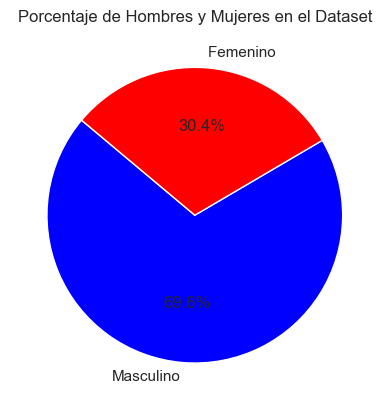

In [34]:
gender_counts = df['sex'].value_counts()
plt.pie(gender_counts , labels = gender_counts.index, autopct='%1.1f%%', colors=['Blue', 'Red'], startangle=140)
plt.title('Porcentaje de Hombres y Mujeres en el Dataset')
plt.show()

¿Hay una relación significativa entre la edad y el colesterol sérico, y cómo difiere esta relación entre hombres y mujeres?

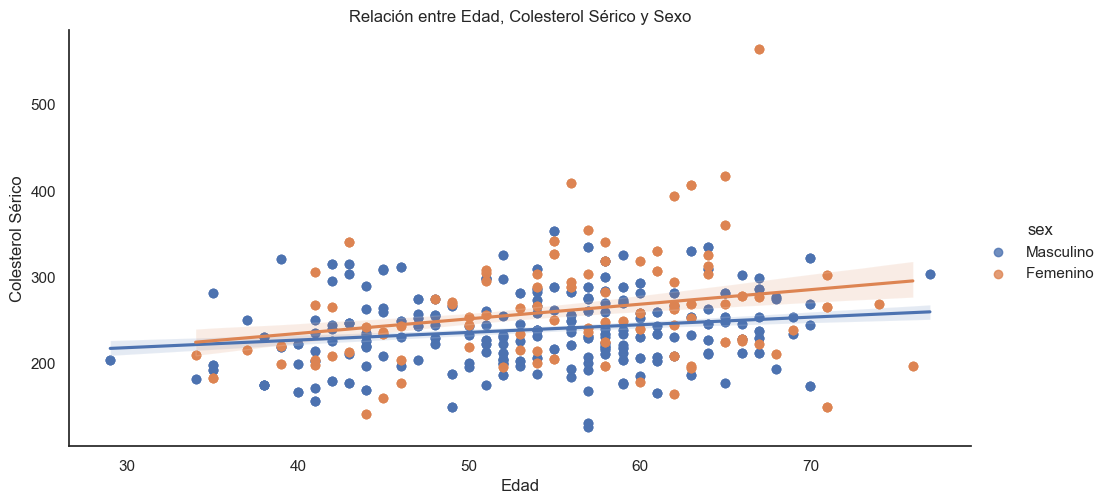

In [51]:
sns.lmplot(x = 'age', y = 'chol', hue = 'sex' , data = df , aspect = 2)
plt.title('Relación entre Edad, Colesterol Sérico y Sexo')
plt.xlabel('Edad')
plt.ylabel('Colesterol Sérico')
plt.show()